In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams['figure.dpi']=300
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='viridis')
%matplotlib inline

In [2]:
data=pd.read_csv(r'D:\ExcelR\Data science\Assignments\Recommendation system Assignment 10\anime.csv')
data

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

## EDA

In [3]:
data.iloc[:,0:].nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [4]:
data.iloc[:,0:].count()

anime_id    12294
name        12294
genre       12232
type        12269
episodes    12294
rating      12064
members     12294
dtype: int64

In [5]:
data[data.isnull().any(axis=1)]

anime_id                                               name  \
2844      33242          IS: Infinite Stratos 2 - Infinite Wedding   
3541      33589                                      ViVid Strike!   
6040      29765                                  Metropolis (2009)   
6646      32695                                       Match Shoujo   
7018      33187                                   Katsudou Shashin   
...         ...                                                ...   
12274     34492  Nuki Doki! Tenshi to Akuma no Sakusei Battle -...   
12279     34491                       Sagurare Otome The Animation   
12280     34312                                       Saimin Class   
12282     34388                    Shikkoku no Shaga The Animation   
12285     34399                                   Taimanin Asagi 3   

                              genre     type episodes  rating  members  
2844                            NaN  Special        1    7.15     6604  
3541                            NaN       TV       12    6.96    12345  
6040                            NaN    Movie        1    6.27      313  
6646                            NaN      ONA        1    6.02      242  
7018                            NaN    Movie        1    5.79      607  
...                             ...      ...      ...     ...      ...  
12274                        Hentai      OVA  Unknown     NaN      392  
12279                        Hentai      OVA        1     NaN       79  
12280                        Hentai      OVA  Unknown     NaN      240  
12282                        Hentai      OVA  Unknown     NaN      195  
12285  Demons, Hentai, Supernatural      OVA  Unknown     NaN      485  

[277 rows x 7 columns]

In [6]:
rating_avg=data['rating'].mean()

In [7]:
data['rating'].fillna(rating_avg,inplace=True)

In [8]:
genre_mode=data['genre'].mode()[0]
genre_mode

'Hentai'

In [9]:
data['genre'].fillna(genre_mode,inplace=True)

In [10]:
type_mode=data['type'].mode()[0]
type_mode

'TV'

In [11]:
data['type'].fillna(type_mode,inplace=True)

In [12]:
data.iloc[:,0:].count()

anime_id    12294
name        12294
genre       12294
type        12294
episodes    12294
rating      12294
members     12294
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='count', ylabel='genre'>

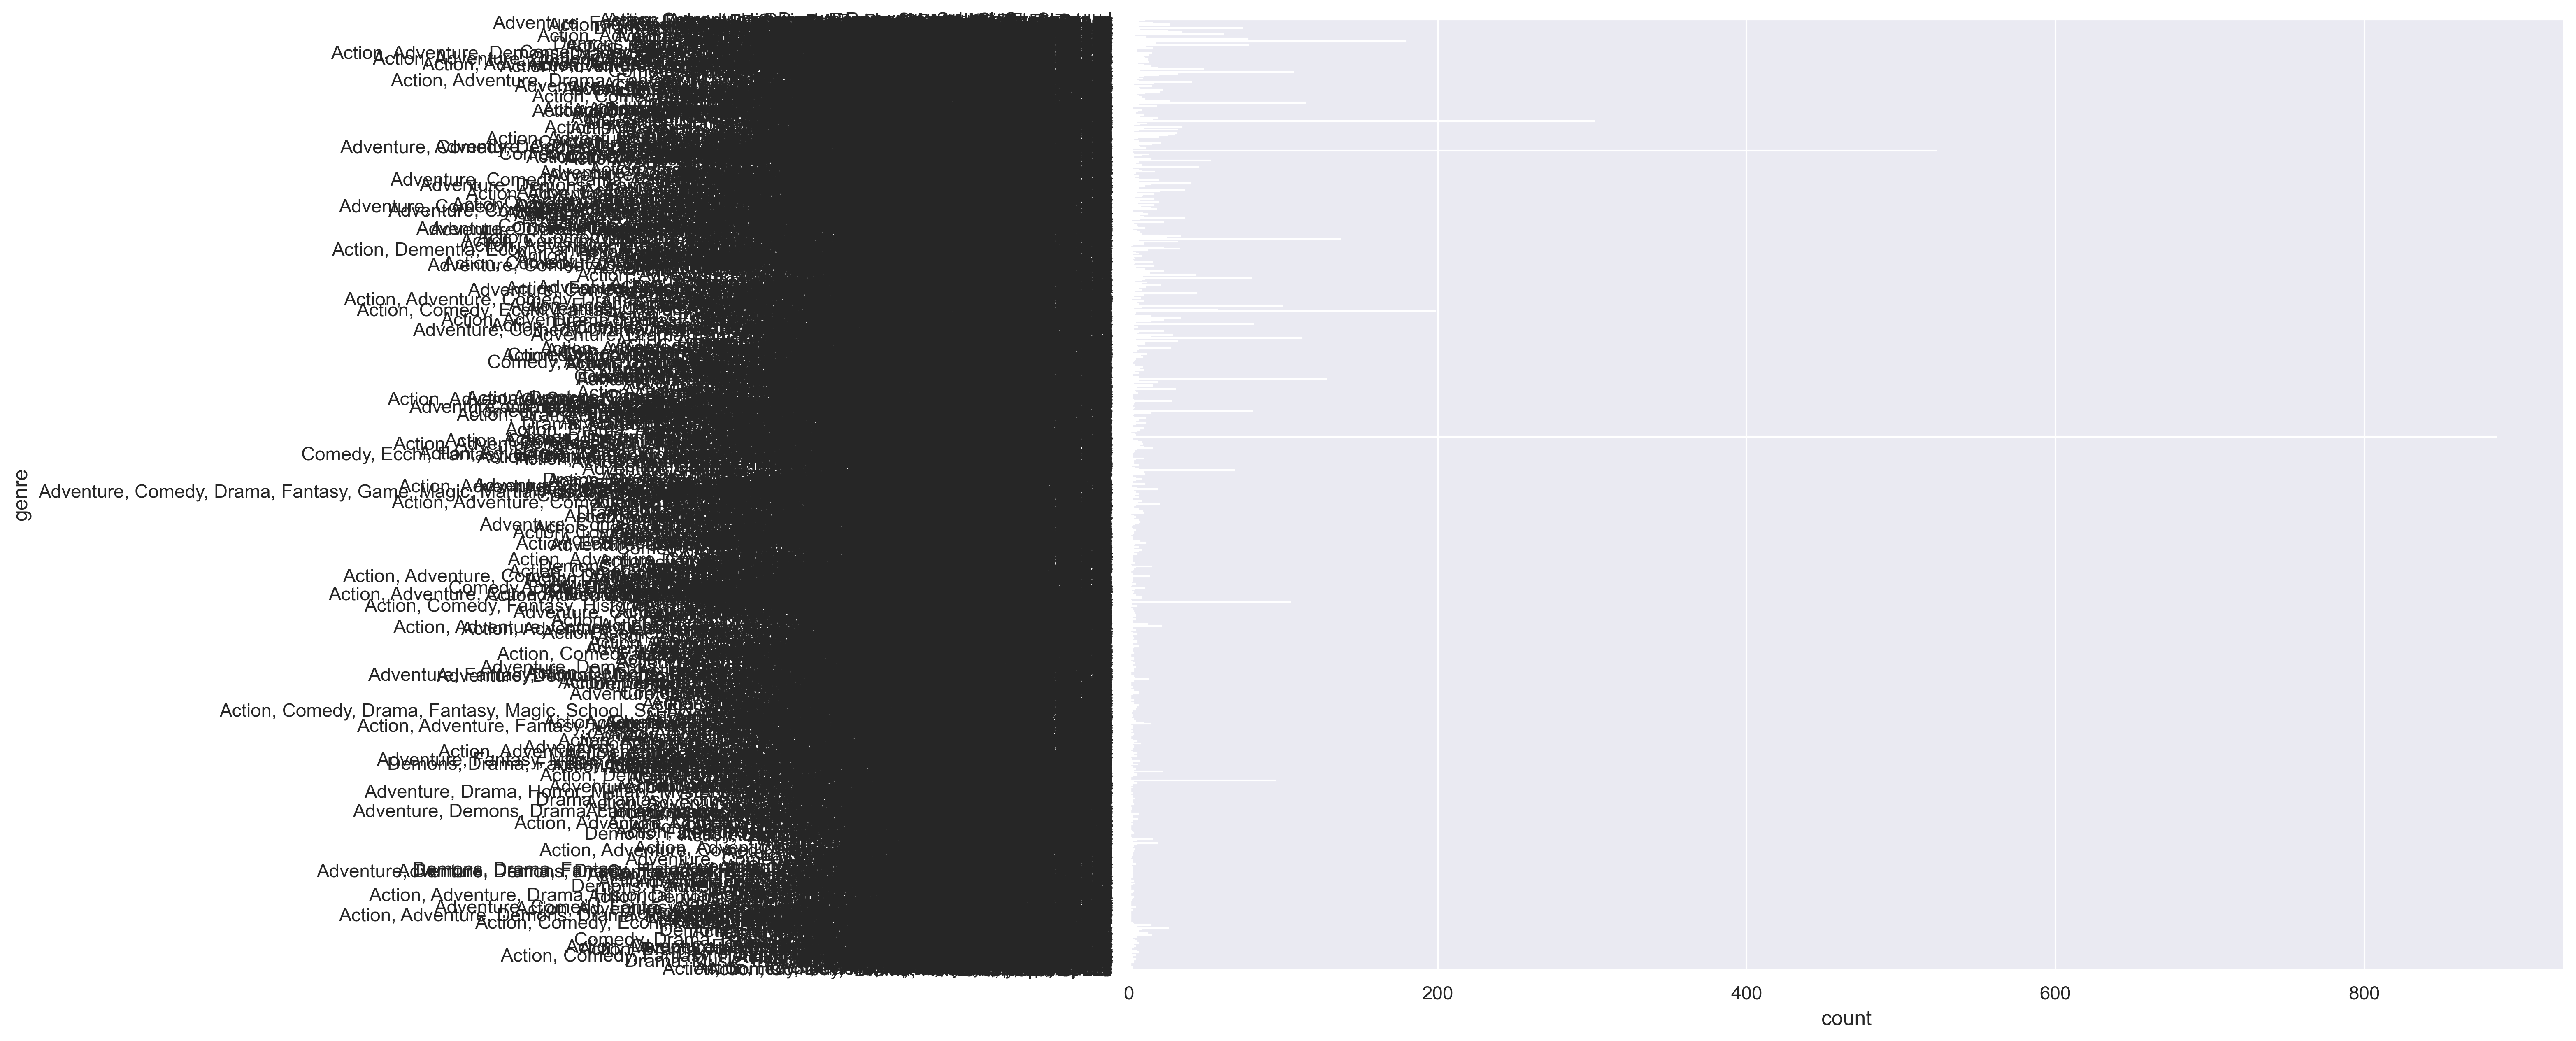

In [13]:
sns.countplot(y=data['genre'])

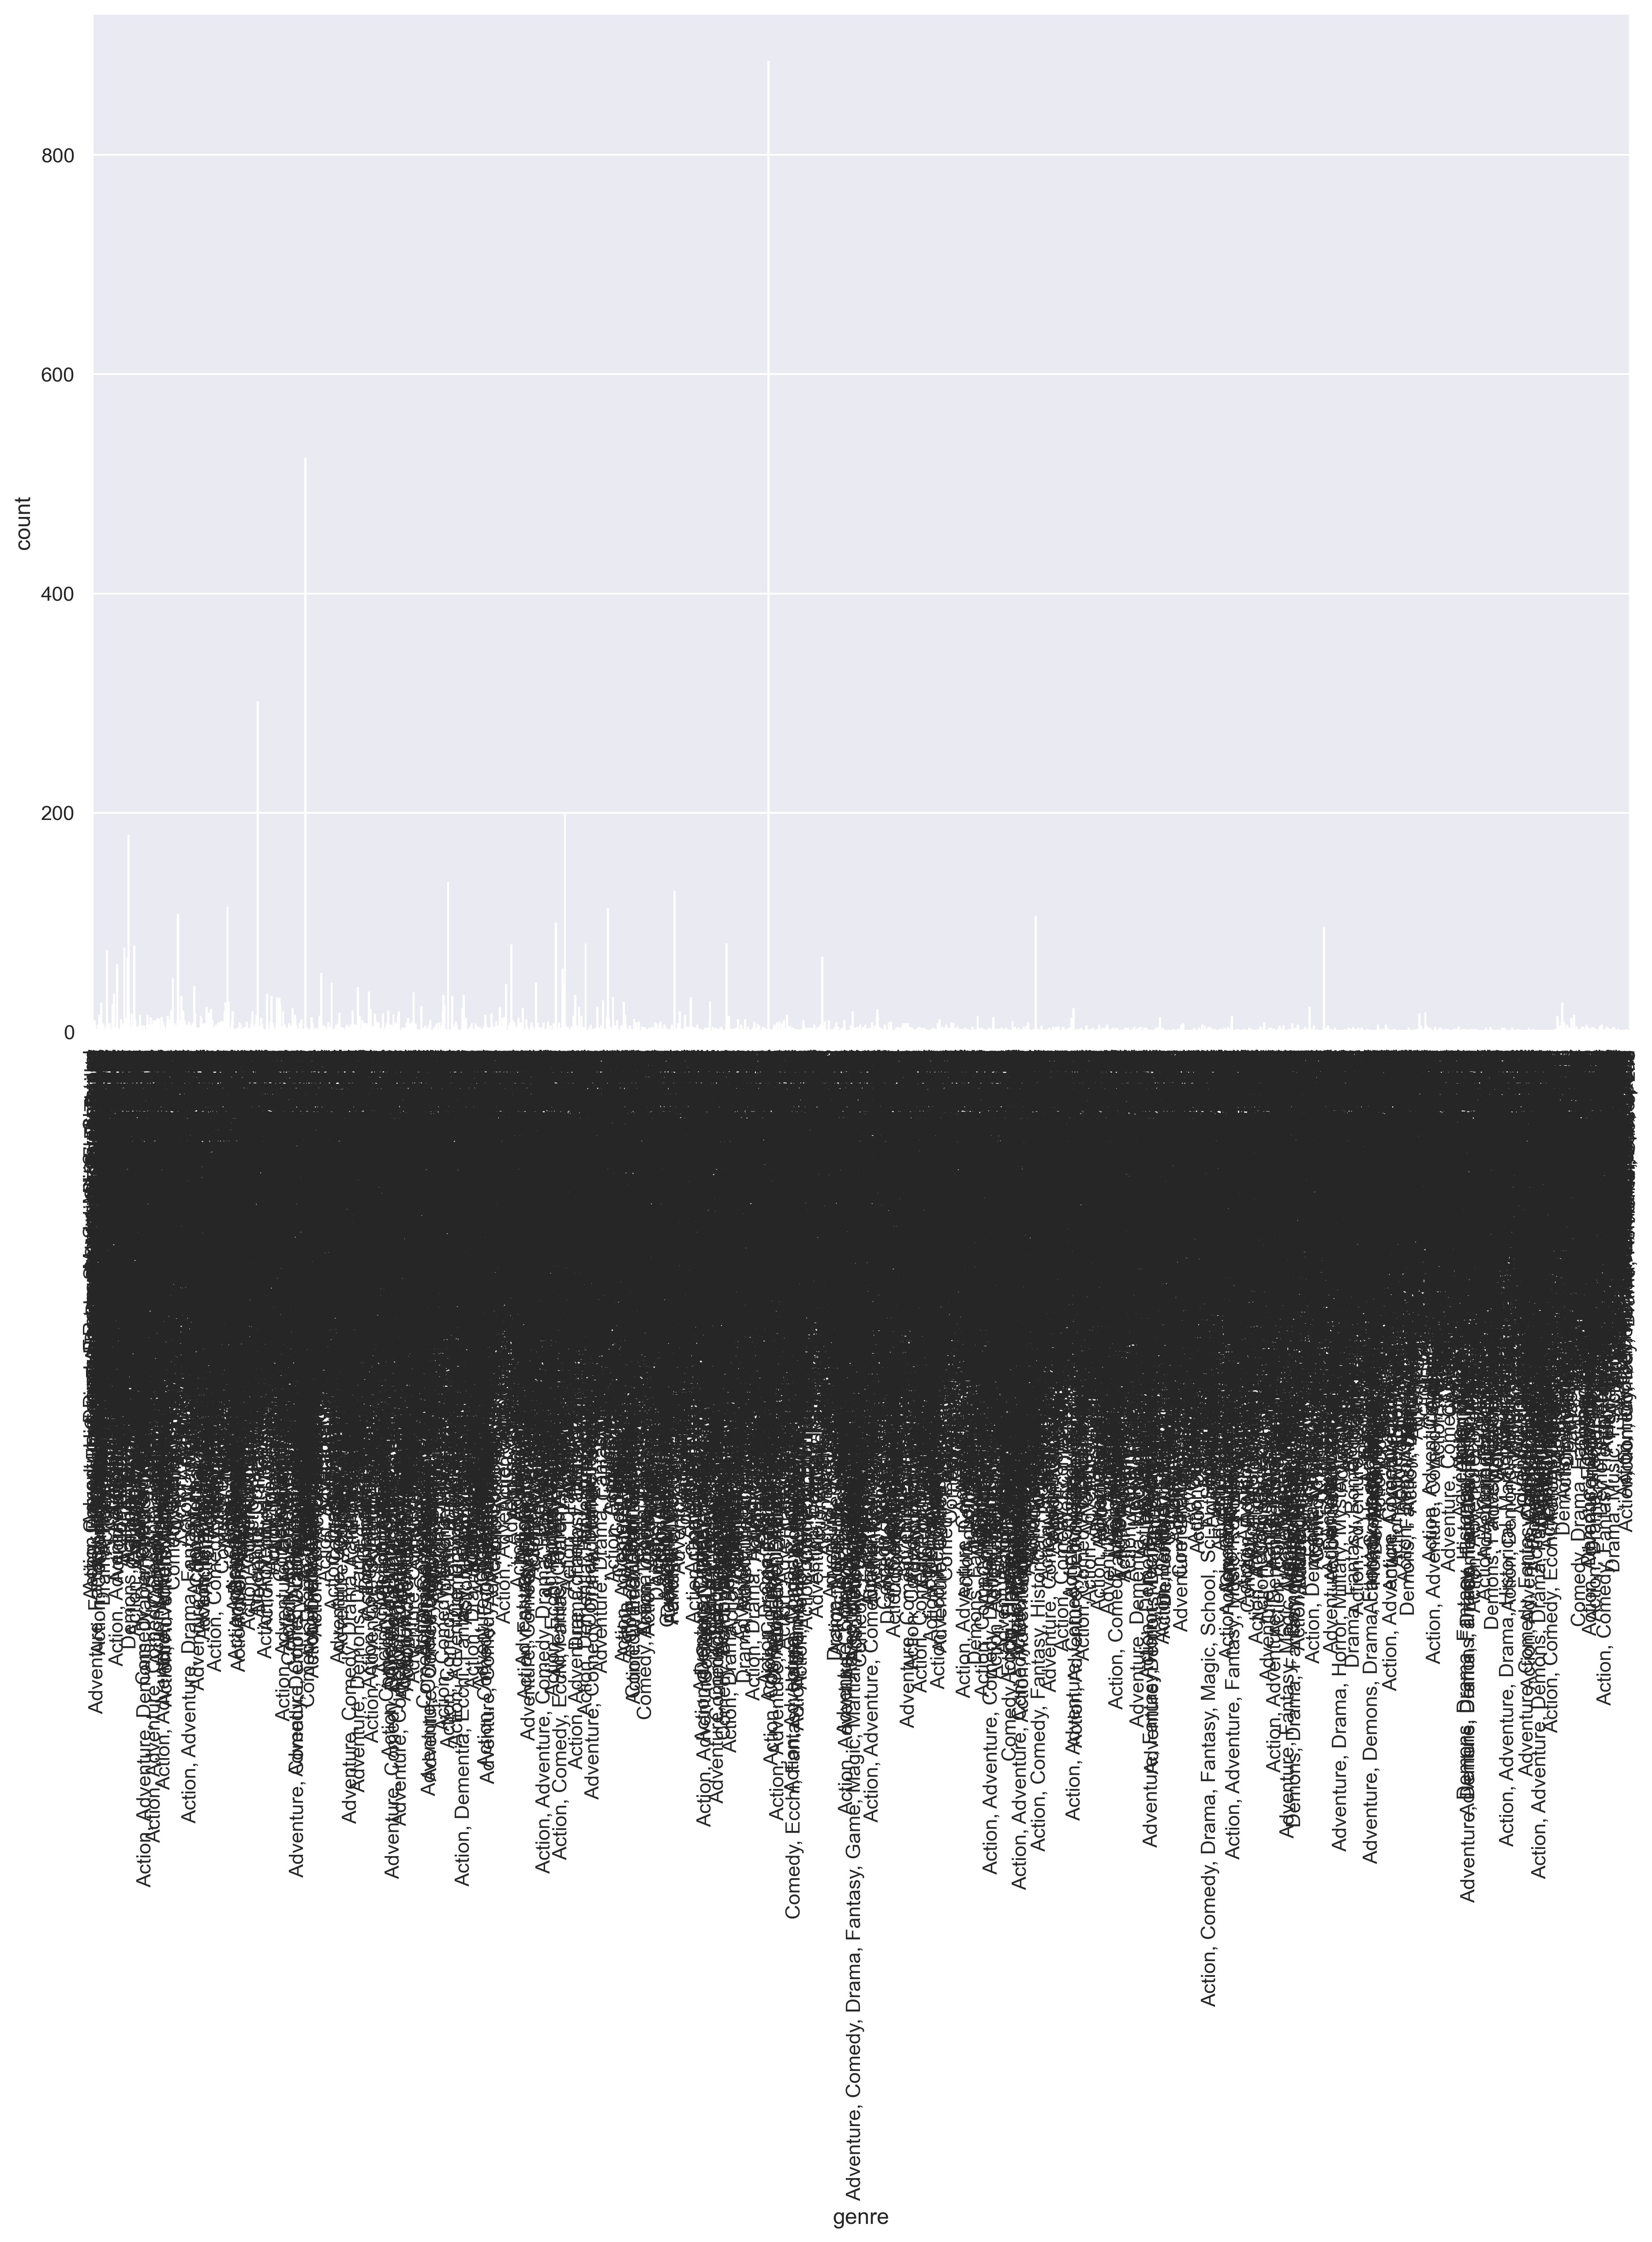

In [14]:
sns.countplot(x=data['genre'])
plt.xticks(rotation=90)
plt.show()

(array([2318., 2259., 1385., 1669., 1745.,  673.,  625.,  512.,  560.,
         548.]),
 array([   0. ,  326.3,  652.6,  978.9, 1305.2, 1631.5, 1957.8, 2284.1,
        2610.4, 2936.7, 3263. ]),
 <BarContainer object of 10 artists>)

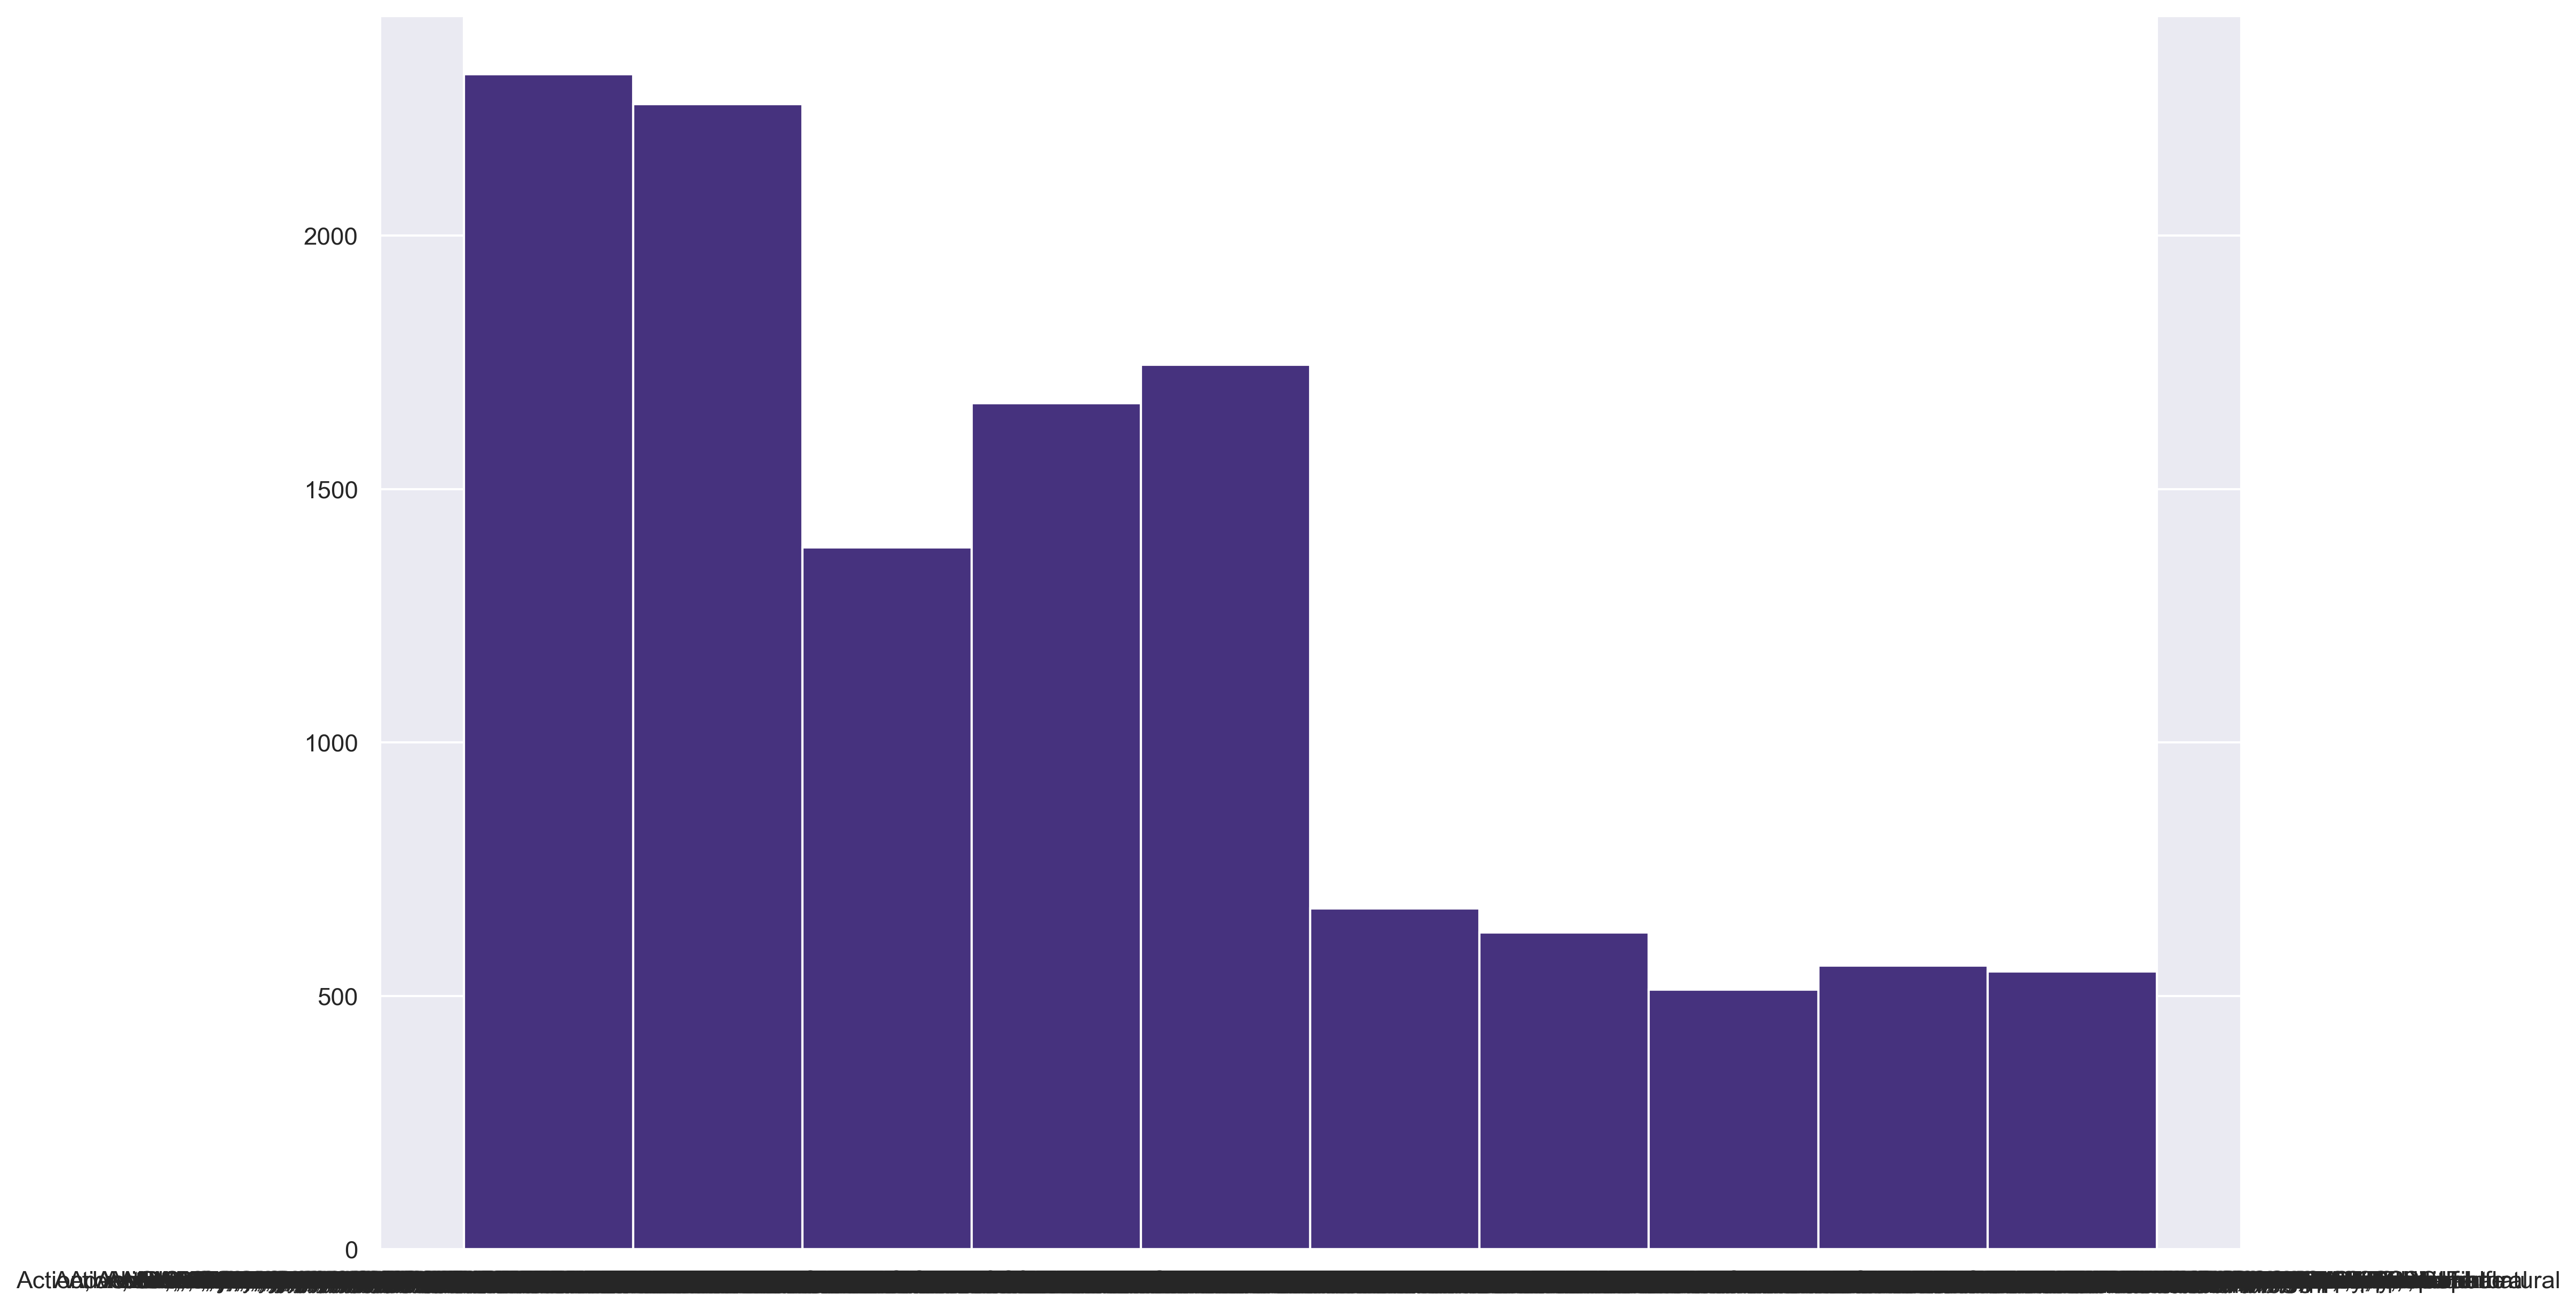

In [15]:
plt.hist(data['genre'])

<AxesSubplot:xlabel='genre'>

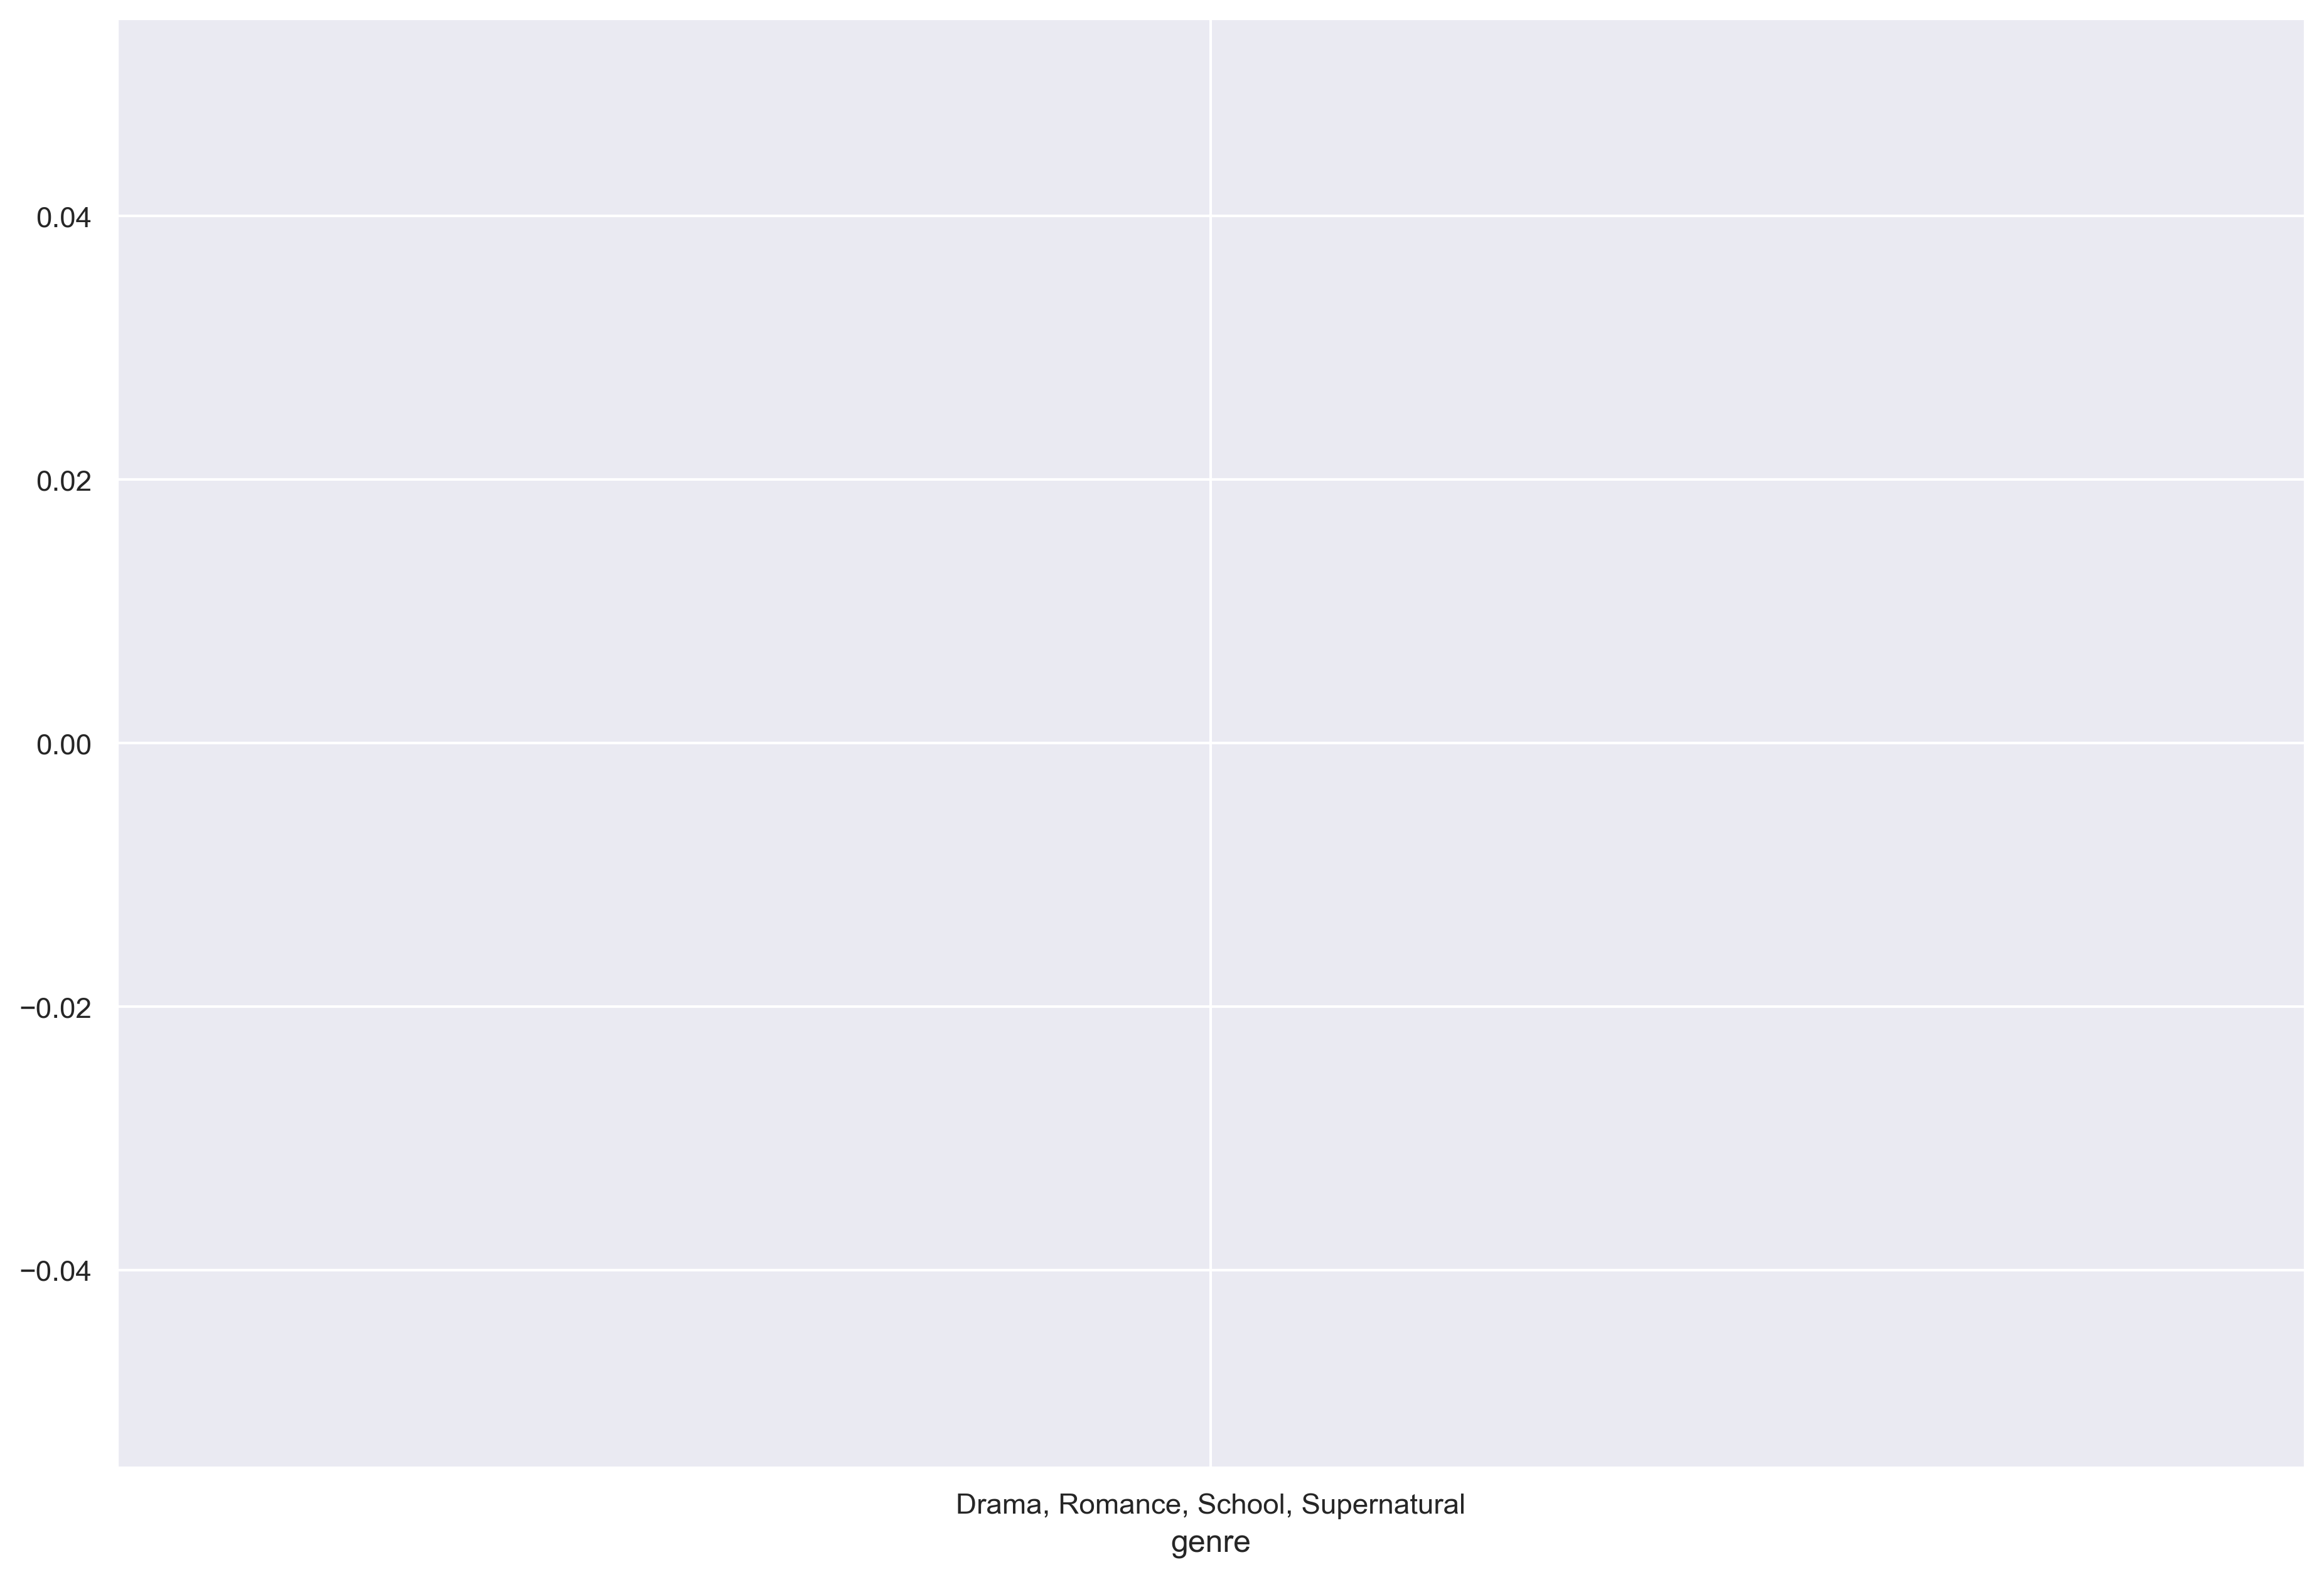

In [40]:
sns.scatterplot(data['genre'])

In [16]:
data['genre'].value_counts()

Hentai                                                  885
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: genre, Length: 3264, dtype: int64

## Model Building 

In [17]:
# user to user based data

In [18]:
data

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

In [19]:
pivot=pd.pivot(data=data,index='anime_id',columns='genre',values='rating')

In [20]:
pivot

genre     Action  Action, Adventure  \
anime_id                              
1            NaN                NaN   
5            NaN                NaN   
6            NaN                NaN   
7            NaN                NaN   
8            NaN                NaN   
...          ...                ...   
34514        NaN                NaN   
34519        NaN                NaN   
34522        NaN                NaN   
34525        NaN                NaN   
34527        NaN                NaN   

genre     Action, Adventure, Cars, Comedy, Sci-Fi, Shounen  \
anime_id                                                     
1                                                      NaN   
5                                                      NaN   
6                                                      NaN   
7                                                      NaN   
8                                                      NaN   
...                                                    ...   
34514                                                  NaN   
34519                                                  NaN   
34522                                                  NaN   
34525                                                  NaN   
34527                                                  NaN   

genre     Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports  \
anime_id                                                            
1                                                       NaN         
5                                                       NaN         
6                                                       NaN         
7                                                       NaN         
8                                                       NaN         
...                                                     ...         
34514                                                   NaN         
34519                                                   NaN         
34522                                                   NaN         
34525                                                   NaN         
34527                                                   NaN         

genre     Action, Adventure, Cars, Sci-Fi  Action, Adventure, Comedy  \
anime_id                                                               
1                                     NaN                        NaN   
5                                     NaN                        NaN   
6                                     NaN                        NaN   
7                                     NaN                        NaN   
8                                     NaN                        NaN   
...                                   ...                        ...   
34514                                 NaN                        NaN   
34519                                 NaN                        NaN   
34522                                 NaN                        NaN   
34525                                 NaN                        NaN   
34527                                 NaN                        NaN   

genre     Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi  \
anime_id                                                                                      
1                                                       NaN                                   
5                                                       NaN                                   
6                                                       NaN                                   
7                                                       NaN                                   
8                                                       NaN                                   
...                                                     ...                                   
34514                                                   NaN                               

In [21]:
pivot.fillna(0,inplace=True)

In [22]:
pivot

genre     Action  Action, Adventure  \
anime_id                              
1            0.0                0.0   
5            0.0                0.0   
6            0.0                0.0   
7            0.0                0.0   
8            0.0                0.0   
...          ...                ...   
34514        0.0                0.0   
34519        0.0                0.0   
34522        0.0                0.0   
34525        0.0                0.0   
34527        0.0                0.0   

genre     Action, Adventure, Cars, Comedy, Sci-Fi, Shounen  \
anime_id                                                     
1                                                      0.0   
5                                                      0.0   
6                                                      0.0   
7                                                      0.0   
8                                                      0.0   
...                                                    ...   
34514                                                  0.0   
34519                                                  0.0   
34522                                                  0.0   
34525                                                  0.0   
34527                                                  0.0   

genre     Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports  \
anime_id                                                            
1                                                       0.0         
5                                                       0.0         
6                                                       0.0         
7                                                       0.0         
8                                                       0.0         
...                                                     ...         
34514                                                   0.0         
34519                                                   0.0         
34522                                                   0.0         
34525                                                   0.0         
34527                                                   0.0         

genre     Action, Adventure, Cars, Sci-Fi  Action, Adventure, Comedy  \
anime_id                                                               
1                                     0.0                        0.0   
5                                     0.0                        0.0   
6                                     0.0                        0.0   
7                                     0.0                        0.0   
8                                     0.0                        0.0   
...                                   ...                        ...   
34514                                 0.0                        0.0   
34519                                 0.0                        0.0   
34522                                 0.0                        0.0   
34525                                 0.0                        0.0   
34527                                 0.0                        0.0   

genre     Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi  \
anime_id                                                                                      
1                                                       0.0                                   
5                                                       0.0                                   
6                                                       0.0                                   
7                                                       0.0                                   
8                                                       0.0                                   
...                                                     ...                                   
34514                                                   0.0                               

In [23]:
#Calculate the distances and similarity

In [24]:
from sklearn.metrics import pairwise_distances

In [25]:
pairwise_distances(pivot,metric='cosine')

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [26]:
pd.DataFrame(pairwise_distances(pivot,metric='cosine'))

0      1      2      3      4      5      6      7      8      9      \
0        0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
1        1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2        1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3        1.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0   
4        1.0    1.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12290    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12291    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12292    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12293    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

       ...  12284  12285  12286  12287  12288  12289  12290  12291  12292  \
0      ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
1      ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2      ...    1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0   
3      ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
4      ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289  ...    1.0    1.0    1.0    1.0    1.0    0.0    1.0    1.0    1.0   
12290  ...    1.0    1.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0   
12291  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    0.0    1.0   
12292  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    0.0   
12293  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

       12293  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  
...      ...  
12289    1.0  
12290    1.0  
12291    1.0  
12292    1.0  
12293    0.0  

[12294 rows x 12294 columns]

In [27]:
pd.DataFrame(1-pairwise_distances(pivot,metric='cosine'))

0      1      2      3      4      5      6      7      8      9      \
0        1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12290    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12291    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12292    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12293    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  12284  12285  12286  12287  12288  12289  12290  12291  12292  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      ...    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289  ...    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
12290  ...    0.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0   
12291  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
12292  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
12293  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       12293  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
12289    0.0  
12290    0.0  
12291    0.0  
12292    0.0  
12293    1.0  

[12294 rows x 12294 columns]

In [28]:
data.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

In [29]:
simi=1-pairwise_distances(pivot,metric='cosine')
pd.DataFrame(simi)

0      1      2      3      4      5      6      7      8      9      \
0        1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12290    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12291    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12292    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12293    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  12284  12285  12286  12287  12288  12289  12290  12291  12292  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      ...    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289  ...    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
12290  ...    0.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0   
12291  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
12292  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
12293  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       12293  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
12289    0.0  
12290    0.0  
12291    0.0  
12292    0.0  
12293    1.0  

[12294 rows x 12294 columns]

In [30]:
simi

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
np.fill_diagonal(simi,0)

In [32]:
data

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

In [33]:
similarity=pd.DataFrame(simi)
similarity

0      1      2      3      4      5      6      7      8      9      \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12290    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12291    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12292    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12293    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  12284  12285  12286  12287  12288  12289  12290  12291  12292  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      ...    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12290  ...    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
12291  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12292  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12293  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       12293  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
12289    0.0  
12290    0.0  
12291    0.0  
12292    0.0  
12293    0.0  

[12294 rows x 12294 columns]

In [34]:
data['anime_id'].unique()

array([32281,  5114, 28977, ...,  5621,  6133, 26081], dtype=int64)

In [35]:
similarity.index=data['anime_id'].unique()
similarity.columns=data['anime_id'].unique()

In [36]:
similarity

32281  5114   28977  9253   9969   32935  11061  820    15335  15417  \
32281    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9253     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9969     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5621     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  26031  34399  10368  9352   5541   9316   5543   5621   6133   \
32281  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5114   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977  ...    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
9253   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9969   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543   ...    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
5621   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6133   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       26081  
32281    0.0  
5114     0.0  
28977    0.0  
9253     0.0  
9969     0.0  
...      ...  
9316     0.0  
5543     0.0  
5621     0.0  
6133     0.0  
26081    0.0  

[12294 rows x 12294 columns]

In [37]:
# finding similar users

In [38]:
similarity.idxmax()

32281     8800
5114     32281
28977      868
9253     32281
9969     12413
         ...  
9316     32281
5543     33032
5621     25303
6133     32281
26081     8894
Length: 12294, dtype: int64

In [39]:
data[(data['anime_id']==32281) | (data['anime_id']== 5114)]

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   

   members  
0   200630  
1   793665